In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
# Load the dataset
df = pd.read_csv("format_AAPL.csv")
df['Open - Close/Last'] = df['Open'] - df['Close/Last']
df['High - Low'] = df['High'] - df['Low']

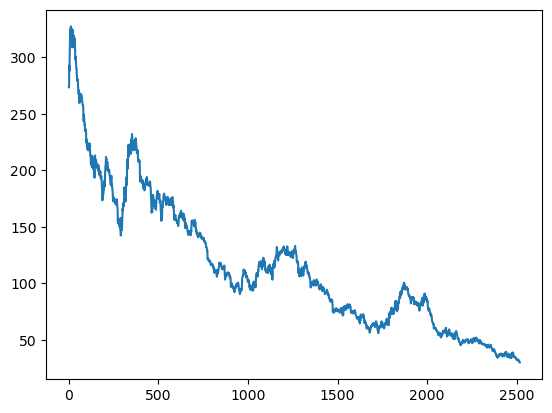

In [41]:
plt.plot(df['Close/Last'],label = 'Closing')

(array([475., 536., 575., 250., 276., 197., 119.,  33.,  20.,  37.]),
 array([ 29.9286 ,  59.72074,  89.51288, 119.30502, 149.09716, 178.8893 ,
        208.68144, 238.47358, 268.26572, 298.05786, 327.85   ]),
 <BarContainer object of 10 artists>)

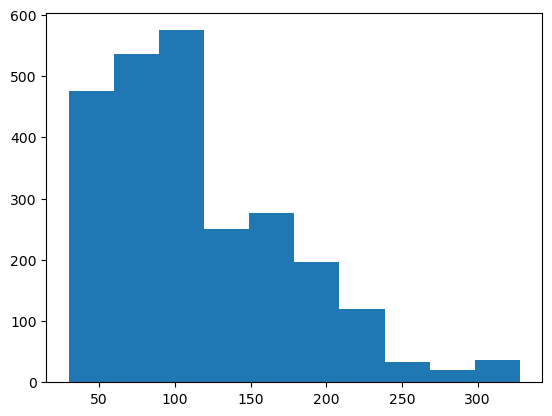

In [42]:
plt.hist(df['High'])

/var/folders/bh/phg5j6rx557fc31zr9pgztnr0000gn/T/ipykernel_3302/1537193394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['High - Low'],hist=False)


<Axes: xlabel='High - Low', ylabel='Density'>

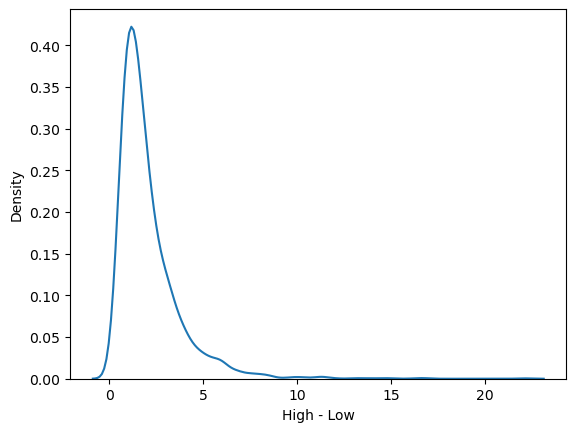

In [43]:
sns.distplot(df['High - Low'],hist=False)

<Axes: >

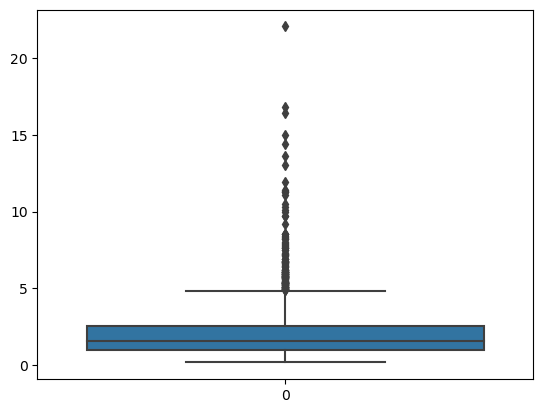

In [44]:
sns.boxplot(df['High - Low'])

<Axes: ylabel='Close/Last'>

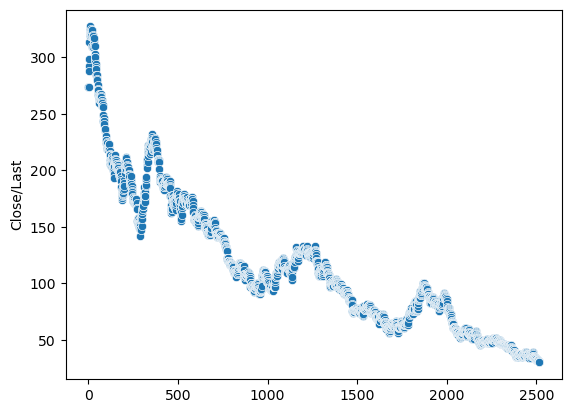

In [45]:
sns.scatterplot(df['Close/Last'])

<Axes: xlabel='Open', ylabel='Close/Last'>

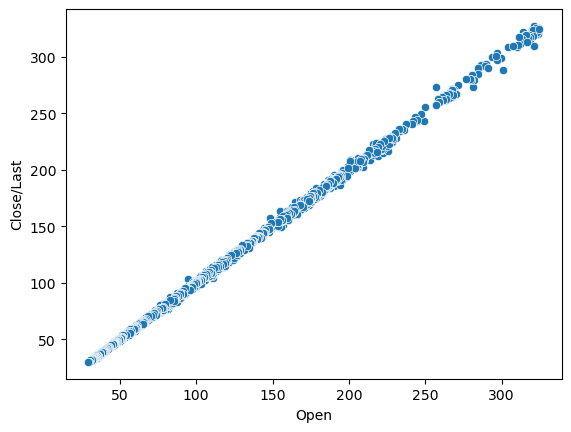

In [46]:
sns.scatterplot(x = df['Open'], y = df['Close/Last'])

/var/folders/bh/phg5j6rx557fc31zr9pgztnr0000gn/T/ipykernel_3302/4125891179.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Open - Close/Last'], x = df['High - Low'],hist=False)


<Axes: xlabel='Open - Close/Last', ylabel='Density'>

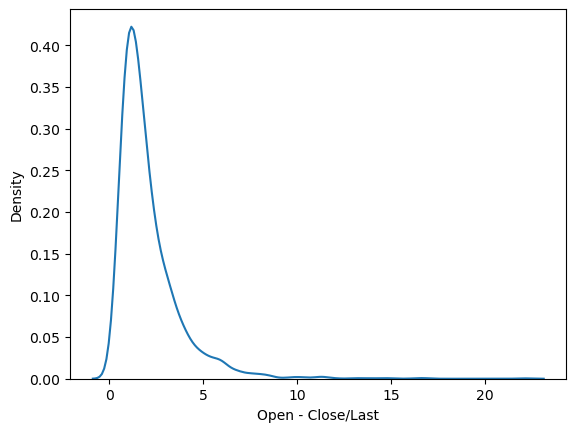

In [47]:
sns.distplot(df['Open - Close/Last'], x = df['High - Low'],hist=False)

<Axes: xlabel='High - Low', ylabel='Open - Close/Last'>

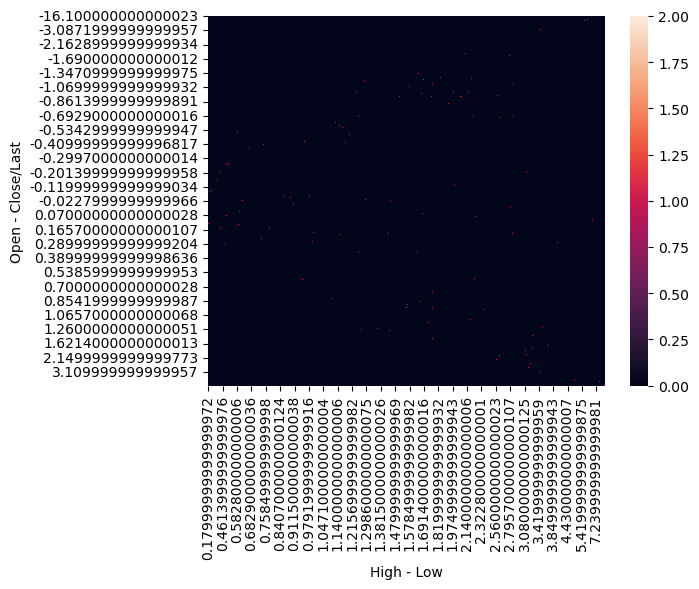

In [48]:
sns.heatmap(pd.crosstab(df['Open - Close/Last'],df['High - Low']))

In [49]:
report = ProfileReport(df,title='AAPL')
report.to_file('AAPL.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
# Select relevant features (based on your analysis)
X = data[["Open", "High", "Low", "Open - Close", "High - Low"]]  # Adjust features as needed
y = data["Close/Last"]

In [51]:
# Split into training and testing sets (75/25 split recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=46)

In [52]:
# Scale features (recommended for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# Create a KNN regressor (start with a default of 1 neighbors)
knn = KNeighborsRegressor(n_neighbors=1)

In [54]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [55]:
# Make predictions on the testing set
y_pred = knn.predict(X_test)

In [56]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 25.302080017349212
R-squared (R^2): 0.9935421472443837


In [57]:
# Experiment with hyperparameter tuning (optional)
# Try different values of k to find the best performance
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("k =", k, "MSE =", mse)

k = 1 MSE = 25.302080017349212
k = 2 MSE = 19.623812281269842
k = 3 MSE = 17.024214687779537
k = 4 MSE = 17.159248410577383
k = 5 MSE = 16.42438050408445
k = 6 MSE = 14.554115719623454
k = 7 MSE = 15.537124981306777
k = 8 MSE = 18.17599538004514
k = 9 MSE = 18.38989059927572
k = 10 MSE = 20.568579583026345
k = 11 MSE = 19.96177927313012
k = 12 MSE = 20.635760175562925
k = 13 MSE = 21.020100739402345
k = 14 MSE = 22.040834572381826
k = 15 MSE = 21.478270716430604
k = 16 MSE = 22.728165009031866
k = 17 MSE = 23.217455374916174
k = 18 MSE = 23.6556779069124
k = 19 MSE = 24.234428989017363
k = 20 MSE = 25.23839536899804
